In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

In [3]:

#IMPORTING DATASET
dataset = pd.read_csv('detergent.csv')
dataset.head(5)

Detergent  Temp  Perf
0     Super  Cold     4
1     Super  Cold     5
2     Super  Cold     6
3     Super  Cold     5
4     Super  Warm     7

<Figure size 432x288 with 0 Axes>

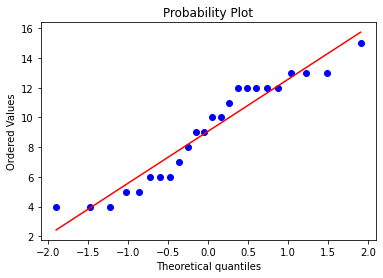

<Figure size 432x288 with 0 Axes>

In [4]:
#Normality plot. Our variable is "charges"

stats.probplot(dataset.Perf, plot=plt)
plt.figure()

In [5]:
#Shapiro wilk test


stats.shapiro(dataset.Perf)

(0.9176760315895081, 0.05190473049879074)

In [6]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [8]:
!pip install pingouin

     |████████████████████████████████| 182 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 835 kB 1.8 MB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193644 sha256=5e4a2a9a1da92bd69e8d9a3f592f1ffd29115ddd00cb6a7eb5309b29aaeb4534
  Stored in directory: /home/damien/.cache/pip/wheels/61/fe/b5/340c9d5290780d6eafcf38988adbb46f82df2301ef7a0996ea
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=956644159722507be90f8cbb199da59898efcb9e684cfce867996d83894eddca
  Stored in directory: /home/damien/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils


In [9]:
import pingouin as pg


In [10]:
pg.homoscedasticity(dataset, dv='Perf', 
                    group='Detergent',
                   method='levene')

W      pval  equal_var
levene  0.452442  0.508182       True

In [11]:
pg.homoscedasticity(dataset, dv='Perf', 
                    group='Temp',
                   method='levene')

W      pval  equal_var
levene  2.015152  0.158274       True

In [12]:
#ANOVA TWO WAYS
model = ols('Perf~Detergent+Temp', data = dataset).fit()
aov2 = sm.stats.anova_lm(model, type=2)
print(aov2)

             df      sum_sq     mean_sq        F        PR(>F)
Detergent   1.0   20.166667   20.166667   7.5625  1.234634e-02
Temp        2.0  200.333333  100.166667  37.5625  1.687925e-07
Residual   20.0   53.333333    2.666667      NaN           NaN
